In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
# Load the processed dataset
df = pd.read_csv('processed_data.csv')

In [3]:
# Define features and target variable
X = df.drop(columns=['heart_attack'])  # Features
y = df['heart_attack']  # Target

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Train Decision Tree model WITHOUT GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [6]:
# Evaluate the model (without tuning)
print("Decision Tree (Without GridSearchCV) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")

Decision Tree (Without GridSearchCV) Evaluation:
Accuracy: 0.6567
Precision: 0.5697
Recall: 0.5756
F1 Score: 0.5726


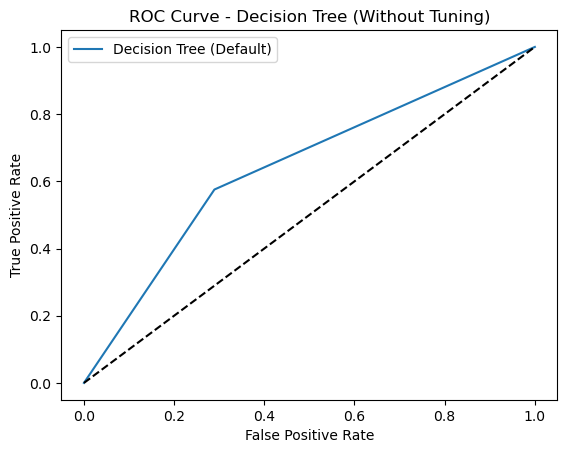

In [7]:
# Plot ROC curve for model without GridSearchCV
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Decision Tree (Default)')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Without Tuning)')
plt.legend()
plt.show()

In [8]:
# Train Decision Tree model WITH GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters found
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)


Best Parameters from GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [9]:
# Use the best estimator
best_dt = grid_search.best_estimator_

In [10]:
# Evaluate the tuned model
y_pred_best_dt = best_dt.predict(X_test)

print("\nDecision Tree (With GridSearchCV) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_dt):.4f}")


Decision Tree (With GridSearchCV) Evaluation:
Accuracy: 0.7297
Precision: 0.6938
Recall: 0.5793
F1 Score: 0.6314


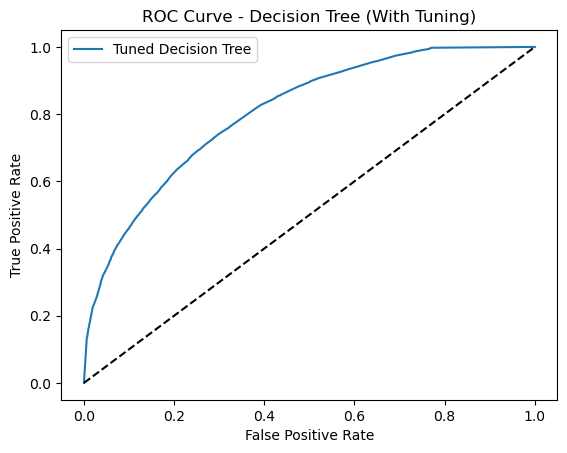

In [11]:
# Plot ROC curve for tuned model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_best, tpr_best, label='Tuned Decision Tree')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (With Tuning)')
plt.legend()
plt.show()